In [ ]:
# Import librerías
import numpy as np
import matplotlib.pyplot as plt
import random as r
import seaborn as sns

# P1

## 1.

En la siguiente celda se crea la función pedida "BrownianTrajectories" recibiendo como parámetros las condiciones iniciales, el tiempo final $T$ y un entero $K$ que determina la finura de la grilla creada.  
Luego, se ve una implementación para 2 simulaciones ($N=2$) para un tiempo final $T=10$ y $K=50$ con las condiciones iniciales usuales, es decir, partiendo desde 0 para cada simulación.

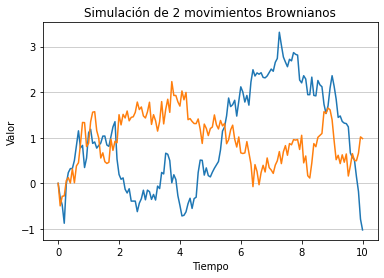

In [ ]:
# x vector de N condiciones iniciales
# ej: para 5 condiciones iniciales, x=[[x1,x2,x3,x4,x5]] con xi siendo la cond inicial número i
# T tiempo final
def BrownianTrajectories(x,T,K):
  N=len(x[0])
  grilla=[]
  for i in range(0,K+1):
    ti=i*T/K
    grilla.append(ti)
  sigma=np.sqrt(grilla[1]-grilla[0]) # desviación estándar
  normal=np.random.normal(loc=0,scale=sigma,size=(K,N))
  sa=np.cumsum(normal, axis=0)
  Brownian=np.concatenate((x,sa))
  return (grilla, Brownian)

# Creación de datos y ploteo
ci=[[0,0]] # condicion inicial en 0
B=BrownianTrajectories(ci,10,150)
plt.plot(B[0],B[1])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Simulación de 2 movimientos Brownianos')
plt.show()

## 2.

En la sigiuente celda se crea la función "logIterado" con el fin de simular $N=50$ simulaciones hasta un tiempo final $T=10^{10}$ y comparar estas trayectorias con las funciones $L(t)= \sqrt{2t\cdot loglog(t)}$ y $-L(t)$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


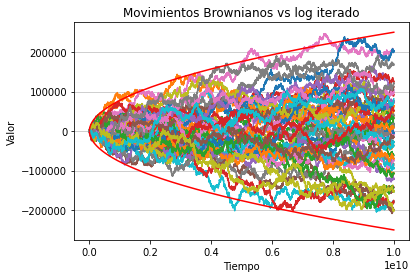

In [ ]:
# Función que grafica varios mov. Brownianos junto con 2 curvas de log iterado
def logIterado():
  N=50
  x=np.zeros(shape=(1,N)) # condición inicial x=0 (vector)
  T=10**10
  B=BrownianTrajectories(x,T,10000) # K=1000 o 10000
  L=np.sqrt(np.multiply(2,B[0])*np.log(np.log(B[0])))
  Lmenos=-1*L
  plt.plot(B[0],B[1])
  plt.plot(B[0],L,color='r')
  plt.plot(B[0],Lmenos,color='r')
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.title('Movimientos Brownianos vs log iterado')
  plt.show()

logIterado()

Como se puede observar en el gráfico de arriba, el comportamiento usual de las simulaciones de movimientos brownianos es que se mantengan acotadas bajo las funciones $L$ y $-L$.  
Esto concuerda con lo visto en clases sobre el teorema del logaritmo iterado.  
Es decir, asinotóticamente se cumple que $|B_t| \sim \sqrt{2t\cdot loglog(t)}$, y como se vió en el teorema, cada movimiento Browniano debiese visitar esa frontera (cota) infinitas veces, tanto como para $L(t)$ como para $-L(t)$.  
Las trayectorias que escapan de esta cota las asociamos a que les faltó tiempo, sumado a la aleatoriedad del proceso.

## 3.

### (a)

En la siguiente celda se crean datos iniciales y funciones que retornen el valor absoluto del movimiento browniano junto con su máximo acumulado. Graficaremos esto con 0 como condición inicial.

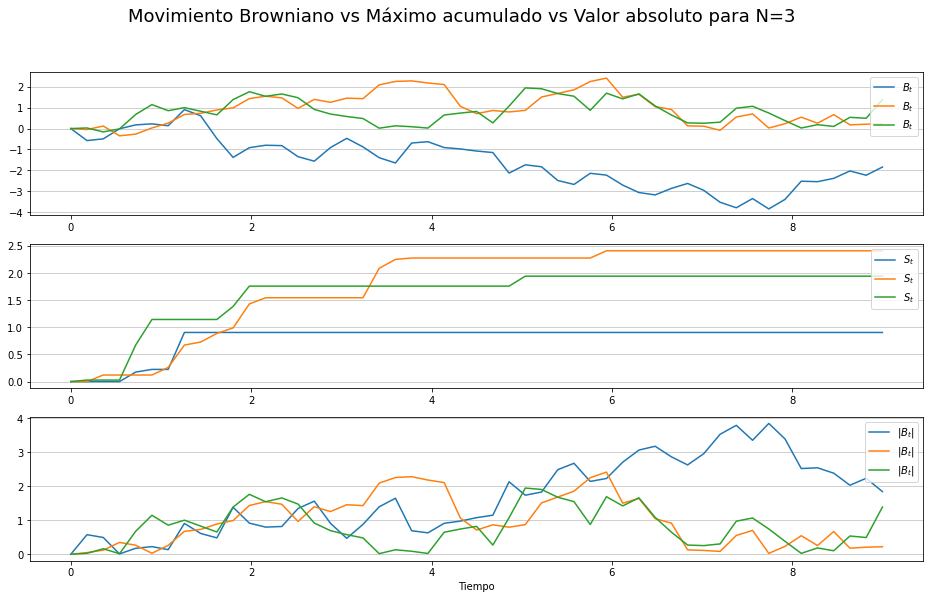

In [ ]:
# Creación de datos
T=9
N=3
K=50
ci2=[[0,0,0]]
B2=BrownianTrajectories(ci2,T,K)

# función que retorna el valor absoluto para la matriz de mov. Browniano
def valorAbsoluto(B):
  return [[abs(x) for x in fila] for fila in B[1]]

# función que retorna una nueva lista con el máximo hasta el punto i en cada coord.
# trabajo con la matriz traspuesta por comodidad pero se invierte al final
def maximoAcumulado(B):
  maB=[]
  Bn=B[1].transpose()
  for i in range(0,len(Bn)):
    maB.append(np.maximum.accumulate(Bn[i]))
  return np.array(maB).transpose()

# creación de datos 
absB2=valorAbsoluto(B2)
maxAcB2=maximoAcumulado(B2)

# ploteo de datos
fig, axs = plt.subplots(3,figsize=(16,9))
fig.suptitle('Movimiento Browniano vs Máximo acumulado vs Valor absoluto para N=3',fontsize=18)
axs[0].plot(B2[0],B2[1],label="$B_t$")
axs[0].grid(axis='y', alpha=0.75)
axs[0].legend(loc="upper right")
axs[1].plot(B2[0],maxAcB2, label="$S_t$")
axs[1].grid(axis='y', alpha=0.75)
axs[1].legend(loc="upper right")
axs[2].plot(B2[0],absB2, label="$|B_t|$")
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tiempo')
plt.legend(loc="upper right")
plt.show()

Como se puede apreciar en la figura anterior, el primero gráfico muestra 3 simulaciones de movimientos brownianos sin ninguna modificación (tal como en la parte 1).  
Por otro lado, el segundo gráfico muestra el comportamiento de los máximos acumulados de las 3 simulaciones anteriores, viéndose como funciones que solo crecen o se mantienen constante $\geq 0$.  
Por último, se puede observar el valor absoluto de cada simulación donde claramente, cada valor se mantiene sobre la recta $y=0$. De hecho, este último grafico se ve como el reflejo del primero con respecto al eje x para valores $\leq 0$.

### (b)

En estas últimas celdas, se crean nuevos datos con el objetivo de crear muchas simulaciones ($10^5$), graficando histogramas sobre los valores de $|B_T|$ y $S_T$ notando que este $T$ indica el tiempo final, es decir, nos quedamos con el último valor de las sucesiones $|B_t|$ y $S_t$.

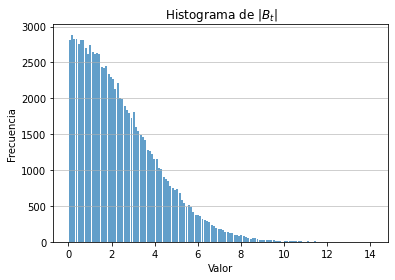

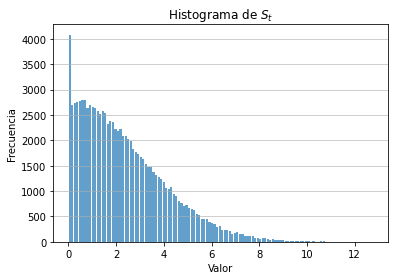

In [ ]:
# NOTA: Antes de ejecutar el código, el K está como 1200, lo cual no demora más de 1 minuto en terminar, pero si 
# se quiere visualizar de mejor forma los histogramas (ya que debiesen ser iguales como se verá mas abajo) se puede
# aumentar el valor de K, pero en tal caso, google colab queda sin memoria RAM. 

# --------------------------------------------------------------------------------------------------------------------

# Creación de datos
N=10**5
T=9
K=1200
ci3=[np.zeros(N)]
B3=BrownianTrajectories(ci3,T,K)
absB3=valorAbsoluto(B3)
maxAcB3=maximoAcumulado(B3)

# Función para tomar el valor B_T con T el tiempo final
def ultimoBrownian(B):
  BT=[]
  Btras=np.array(B).transpose()
  for i in range(0,N):
    BT.append(Btras[i][-1])
  return BT

UB1=ultimoBrownian(absB3)
UB2=ultimoBrownian(maxAcB3)

# Gráfico de histogramas
n, bins, patches = plt.hist(x=UB1, bins='auto',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de $|B_t|$')
plt.show()

n, bins, patches = plt.hist(x=UB2, bins='auto',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de $S_t$')
plt.show()

Tal como se puede observar en los histogramas de arriba, estos siguen un comportamiento del tipo $\textit{Folded normal distribution}$, el cual se ve presente pues estamos tomando valores absolutos y máximos.  
Esto se debe a un principio imortante en esta área que es el $\textit{principio de reflexión}$ que dice que:  
Para tiempo final $T$, un movimiento Browniano $B_T$, su valor absoluto $|B_T|$ y su máximo acumulado $S_T$ tienen la misma ley, donde sabemos por cátedras que la ley de $B_T$ corresponde una $\mathcal{N}(0,1)$, lo cual hace sentido viendo los histogramas de la figura anterior.  
Sobre el segundo histograma, la gran cantidad de valores cercanos a 0 se debe a que, para muchas simulaciones, los valores tienden a ser negativos (o muy crecanos a 0), y por lo tanto el máximo es 0. Esto pues la grilla no es suficientemente fina ($K$ no es demasiado grande, pero aumentar su valor afecta en gran medida la memoria ram para efectos del código).  
Como referencia, me guié del sigiuente libro:  
https://www.stat.berkeley.edu/~aldous/205B/bmbook.pdf 

Para lo último que sigue, sea crea una simulación de movimiento browniano con condición inicial 0 y se calcula su valor absoluto y su máximo acumulado con el fin de graficarlos y notar ciertos comportamientos.

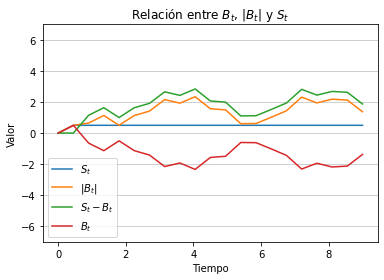

In [ ]:
N=1
T=9
K=20
ci4=[np.zeros(N)]
B4=BrownianTrajectories(ci4,T,K)
absB4=valorAbsoluto(B4)
maxAcB4=maximoAcumulado(B4)
plt.plot(B4[0],maxAcB4, label="$S_t$")
plt.plot(B4[0],absB4, label="$|B_t|$")
plt.plot(B4[0],maxAcB4-B4[1], label="$S_t-B_t$")
plt.plot(B4[0],B4[1], label="$B_t$")
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Relación entre $B_t$, $|B_t|$ y $S_t$')
plt.legend()
ax = plt.gca()
ax.set_ylim([-7, 7]) # ajustar para ver bien el gráfico
plt.show()

Un conocido teorema sobre movimiento Browniano es el teorema de Lévy que dice:  
Sea $S_t$ el máximo acumulado del Browniano $B_t$, entonces el proceso definido por $Y_t=S_t-B_t$ es un movimiento Browniano reflejado, es decir, existen valores $c$, tales que en la rectas $y(t)=c$, el valor de $Y_t$ es el reflejo de $B_t$ con recpecto a esta recta para un subconjunto de tiempos.  
Ejecutando varias veces este algoritmo, se puede apreciar un comportamiento repetitivo con respceto a los valores de $B_t$, $|B_t|$, $S_t$ y $S_t-B_t$.  
1) Si el máximo acumulado se mantiene en 0, los valores de $|B_t|$ y $S_t-B_t$ calzan.  
2) Si el máximo acumulado sube algun valor pequeño $\varepsilon$ , los valores de $|B_t|$ y $S_t-B_t$ se comportan de la misma forma pero desplazados una distancia alrededor de $\varepsilon$. Esto mientras se mantengan ambas curvas arriba del máximo acumulado.  
3) Si el máximo acumulado se encuentra siempre sobre las curvas $|B_t|$ y $S_t-B_t$, entonces estas curvas son el reflejo de la otra con respecto a distintas rectas.  
4) Si alguna de las curvas $|B_t|$ o $S_t-B_t$ sobrepasa el máximo acumulado mientras que la otra se mantiene por debajo, entonces se comportan de la misma forma pero separadas por una (usualmente) gran distancia.  

Con esto se puede observar como se cumple a la perfección el teorema nombrado al inicio simulando este movimiento Browniano.